# 🌍 Country Clustering Analysis using K-Means
### Project Overview
This project applies **Unsupervised Machine Learning (K-Means Clustering)** to cluster countries based on socioeconomic and health-related indicators.

**Objectives:**
- Identify clusters of countries with similar economic and social structures
- Use PCA for dimensionality reduction and 2D visualization
- Interpret patterns to differentiate developed, emerging, and developing nations


## 📦 1. Importing Libraries & Loading Data
We begin by importing required Python libraries and loading the country dataset for analysis.

In [2]:
import pandas as pd


## ⚙️ 2. Data Preprocessing
This step includes cleaning, normalizing, and preparing the dataset before applying clustering algorithms.

In [3]:
df=pd.read_csv('countrydata.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df["child_mortality_rate"]=df["child_mort"].copy()
df["life_expectancy"]=df["life_expec"].copy()
df["total_fertility"]=df["total_fer"].copy()
df["gdp_per_capita"]=df["gdpp"].copy()
df=df.drop(columns=["child_mort","life_expec","total_fer","gdpp"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               167 non-null    object 
 1   exports               167 non-null    float64
 2   health                167 non-null    float64
 3   imports               167 non-null    float64
 4   income                167 non-null    int64  
 5   inflation             167 non-null    float64
 6   child_mortality_rate  167 non-null    float64
 7   life_expectancy       167 non-null    float64
 8   total_fertility       167 non-null    float64
 9   gdp_per_capita        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df["gdp_per_capita"]=df["gdp_per_capita"].astype("float")

In [9]:
df["income"]=df["income"].astype("float")

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

country                 0
exports                 0
health                  0
imports                 0
income                  0
inflation               0
child_mortality_rate    0
life_expectancy         0
total_fertility         0
gdp_per_capita          0
dtype: int64

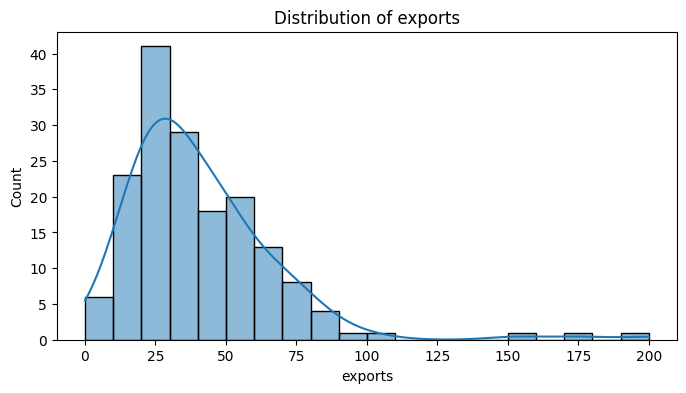

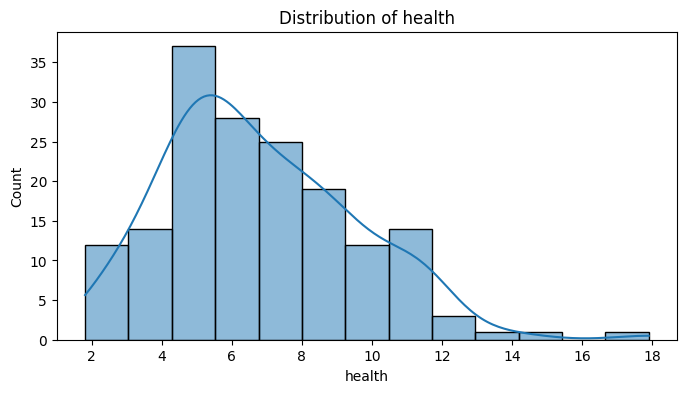

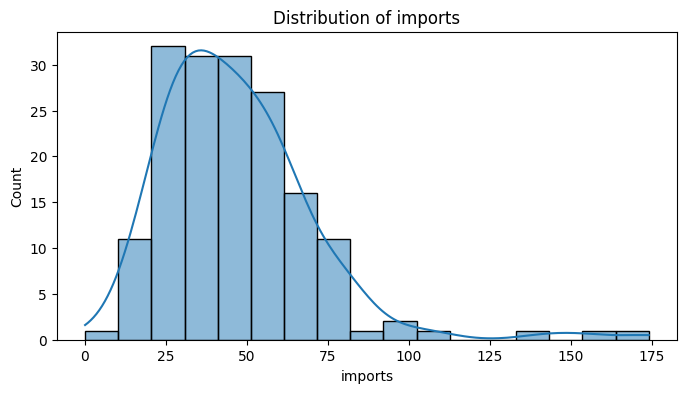

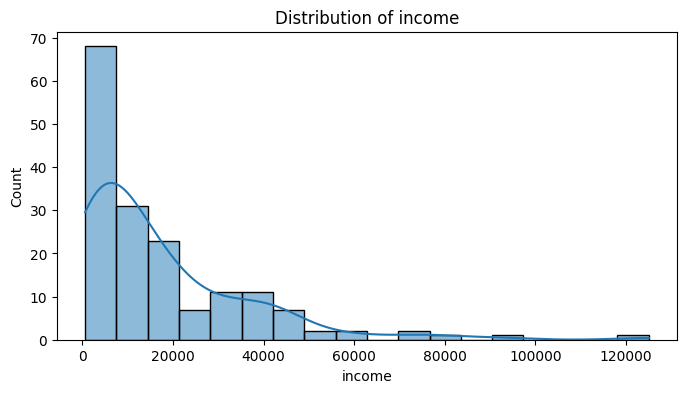

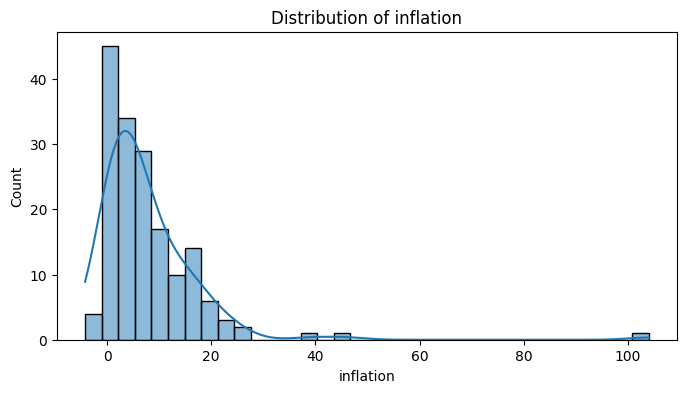

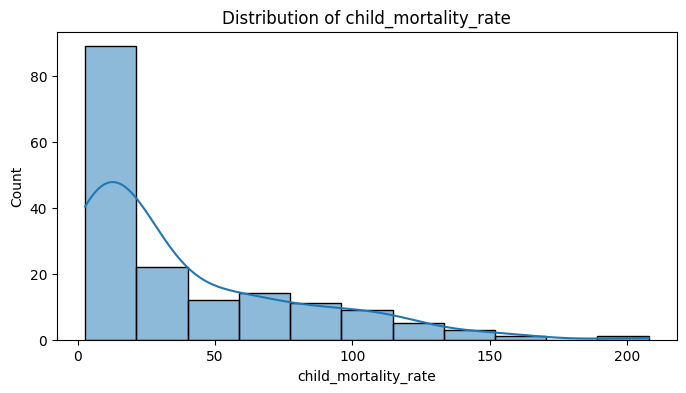

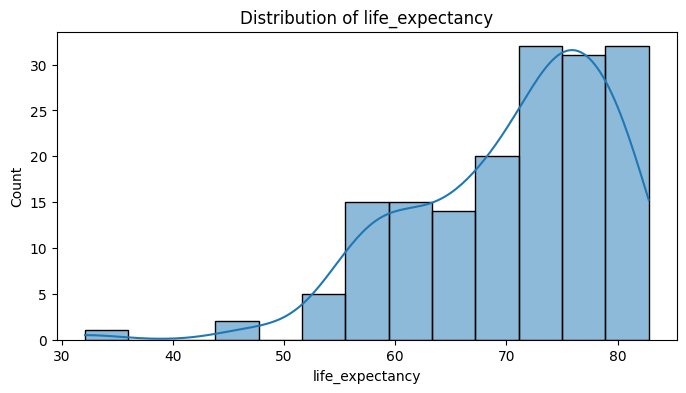

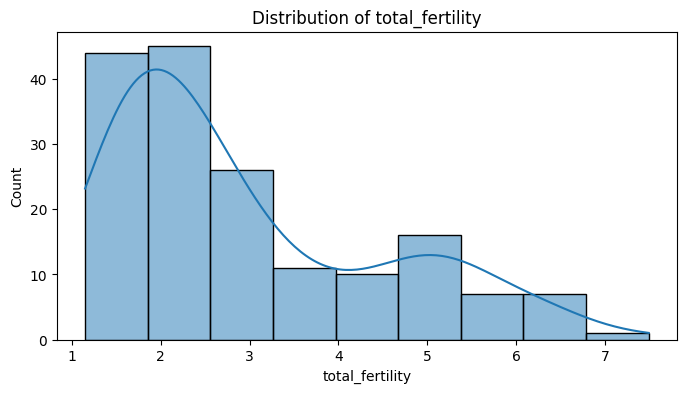

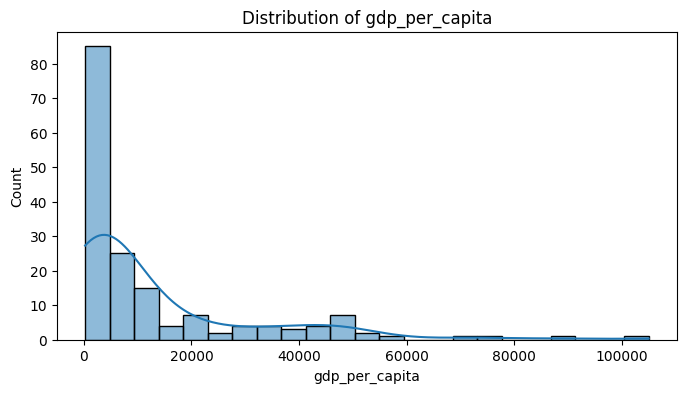

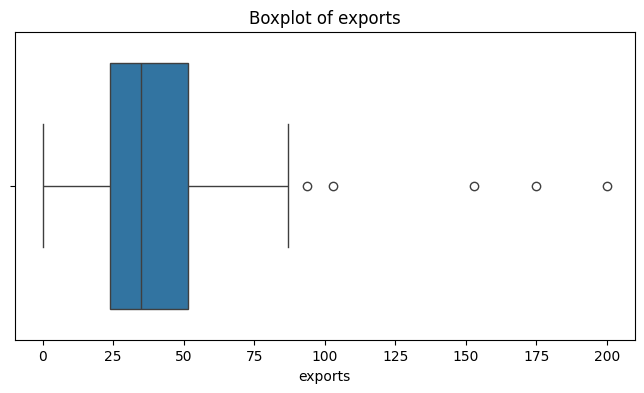

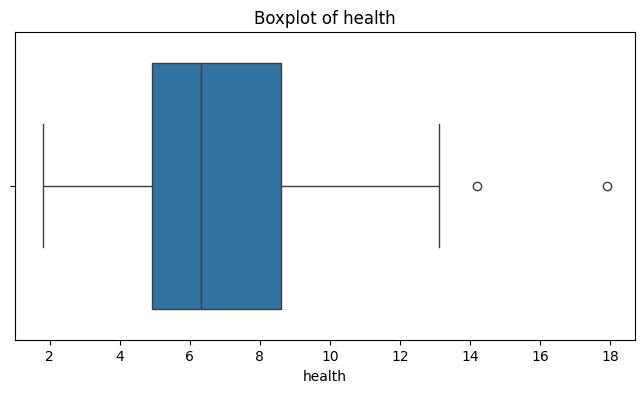

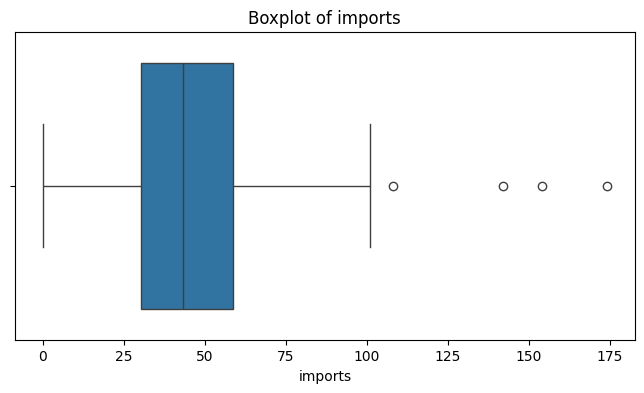

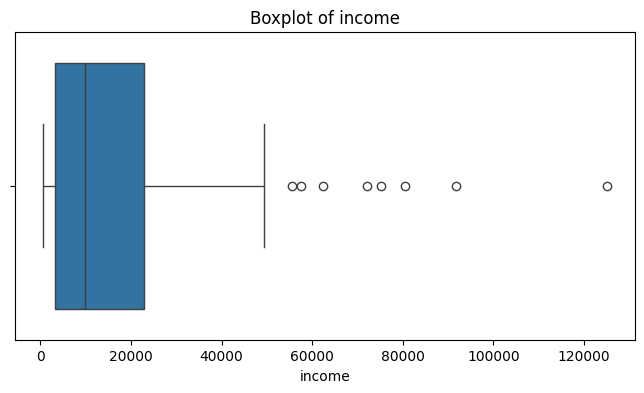

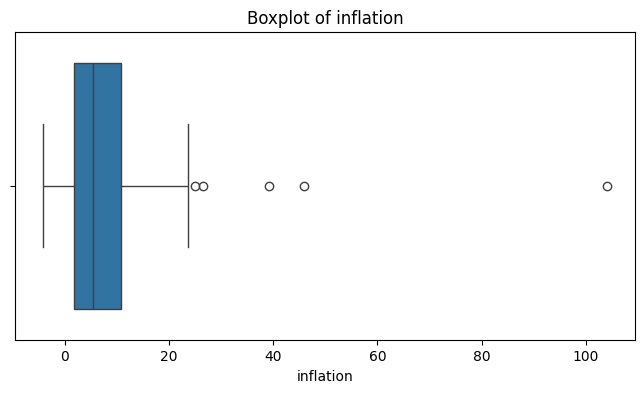

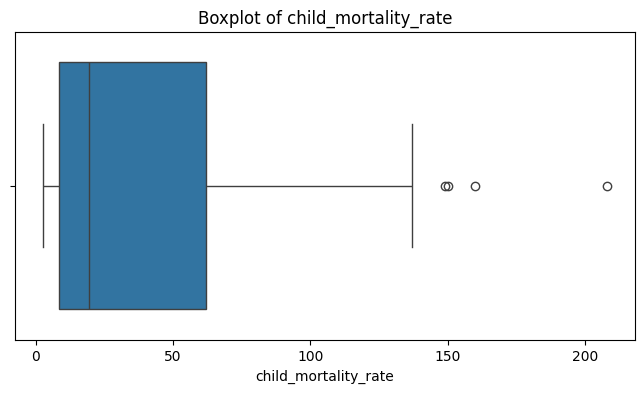

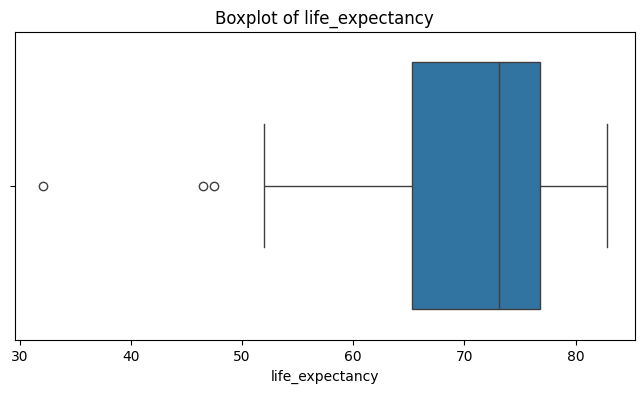

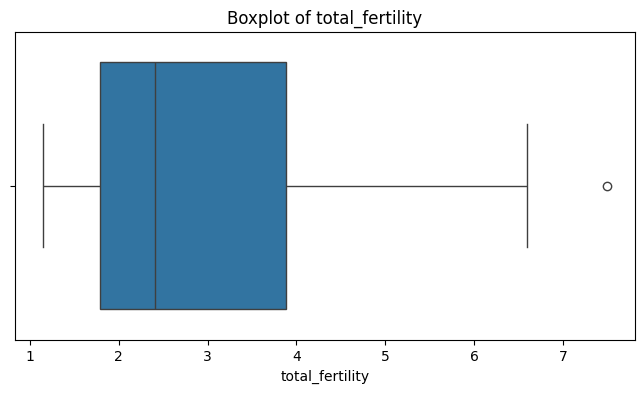

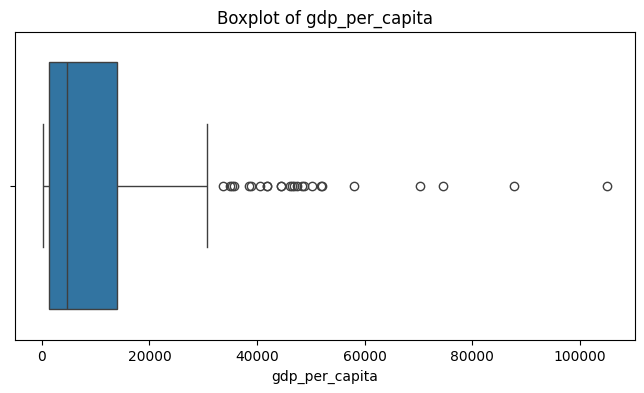

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols=df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

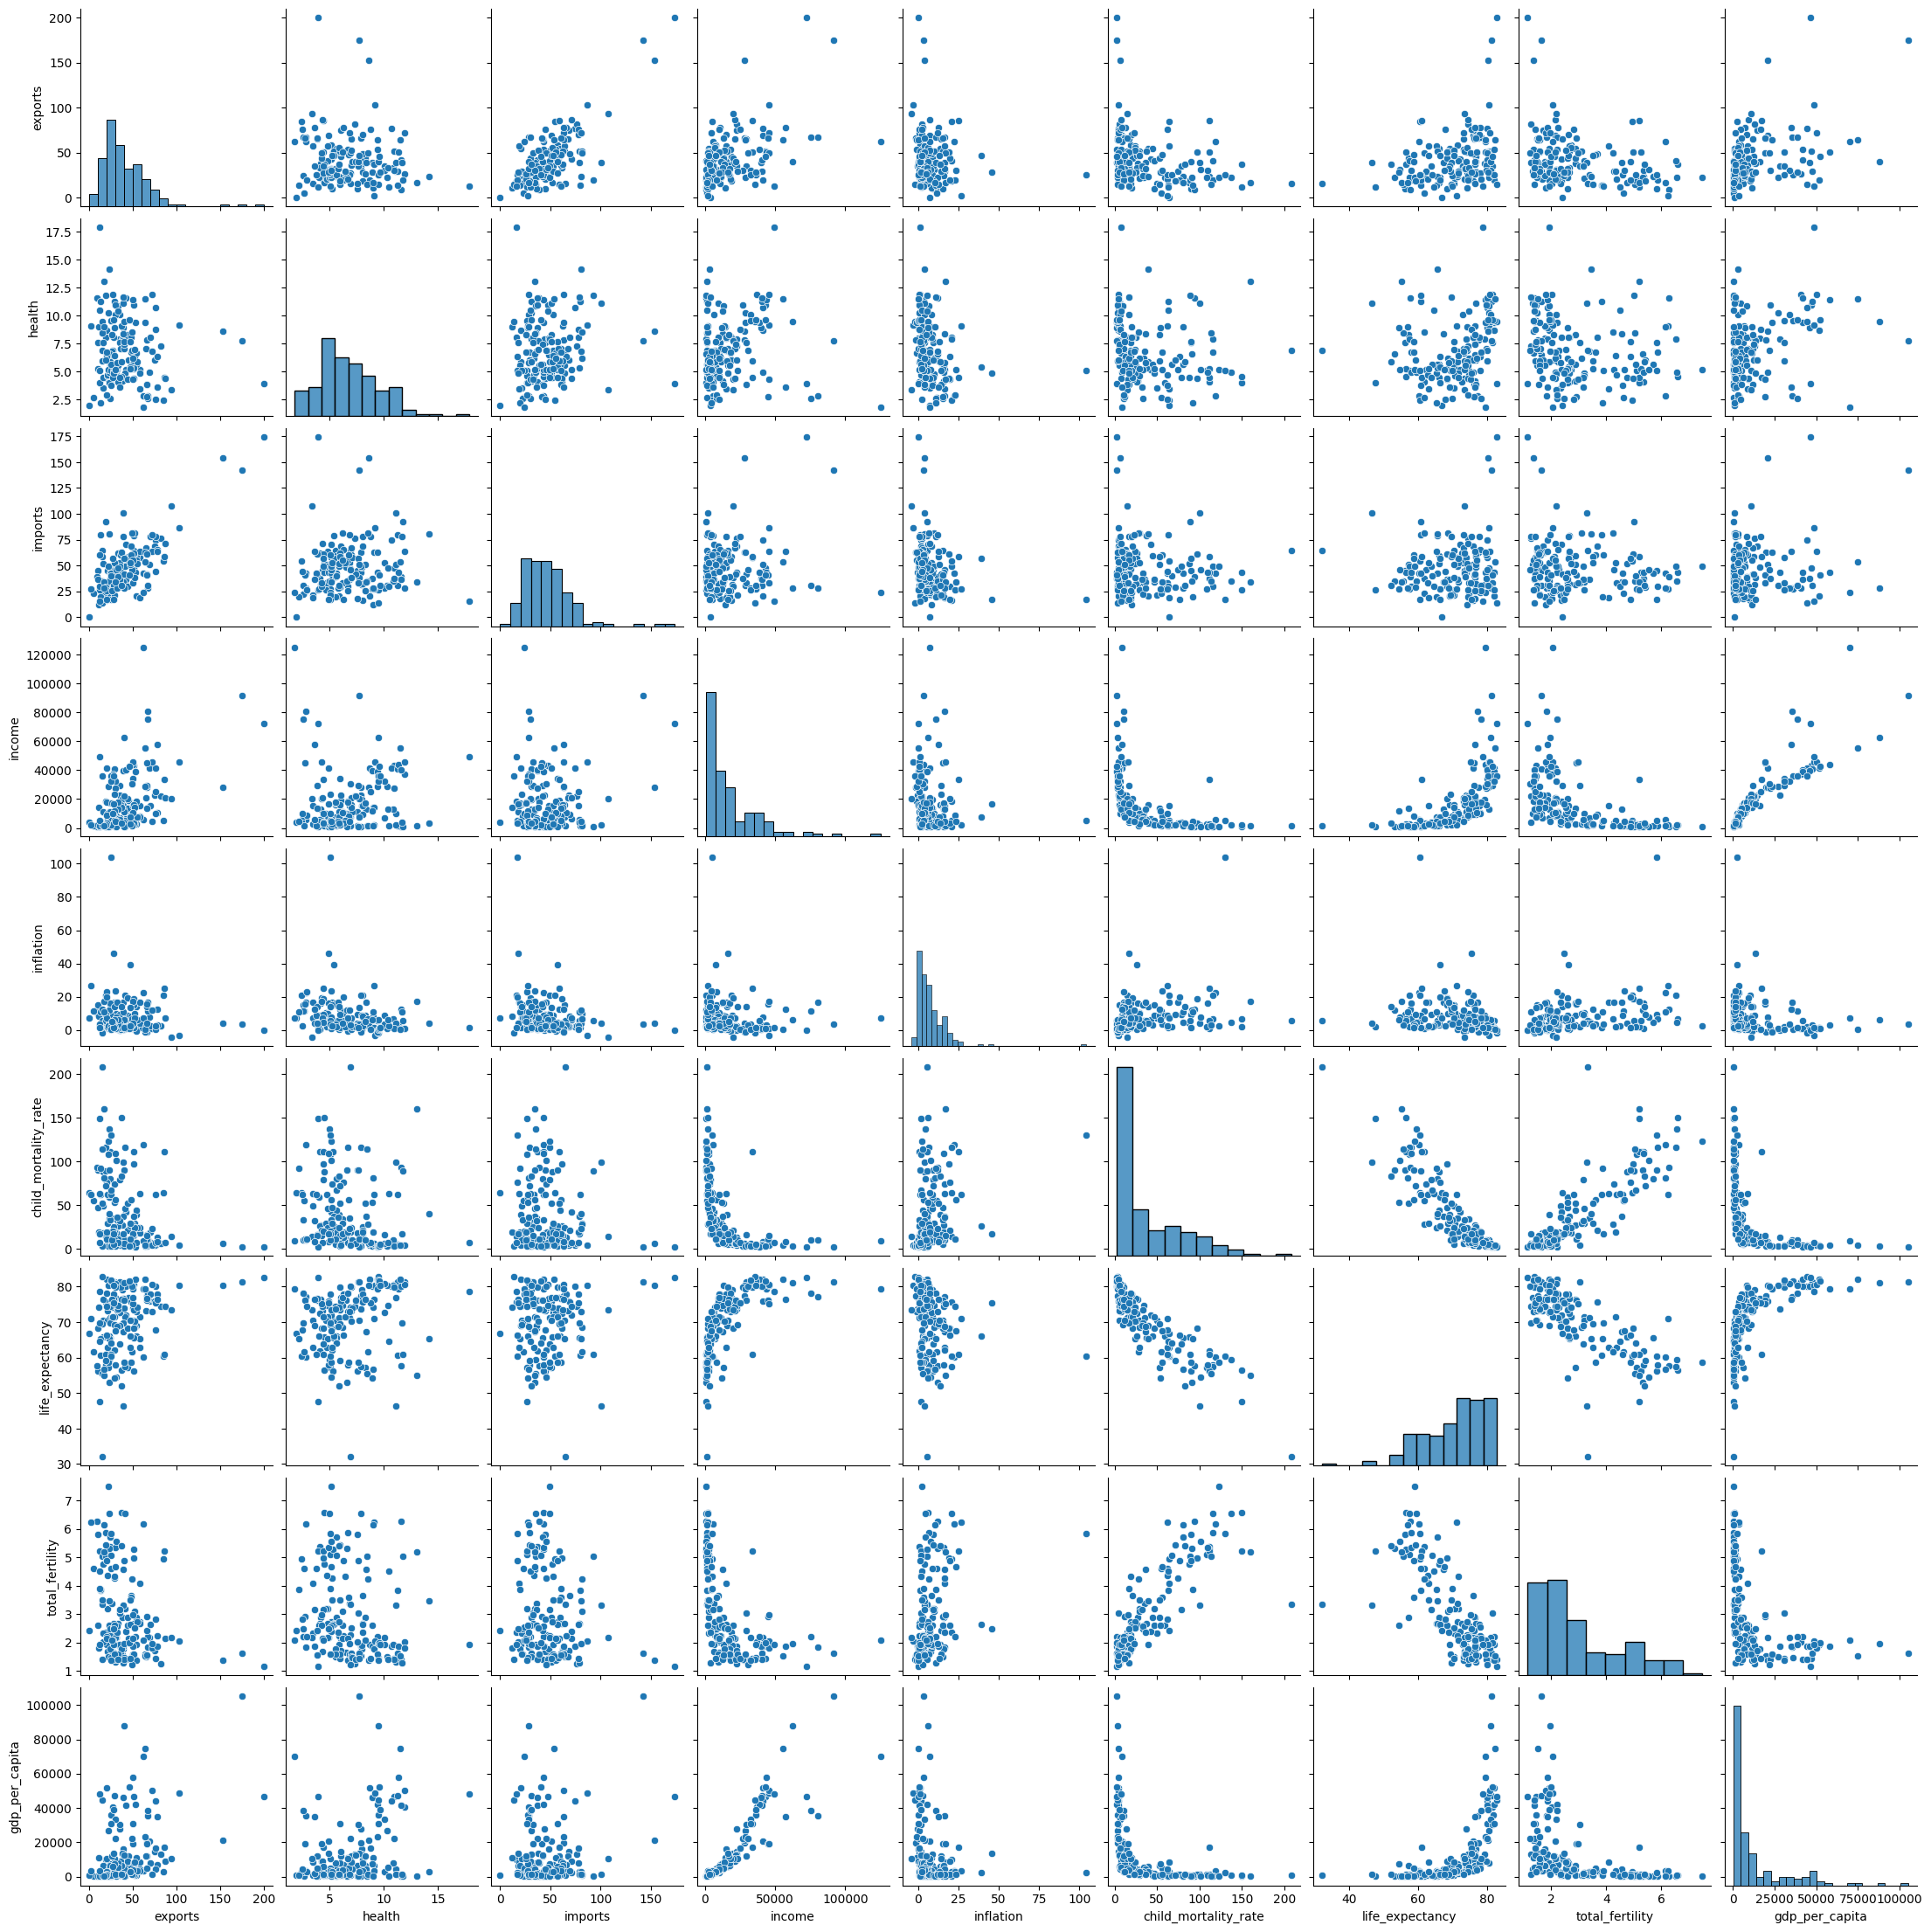

In [13]:
sns.pairplot(df[num_cols])

<Axes: >

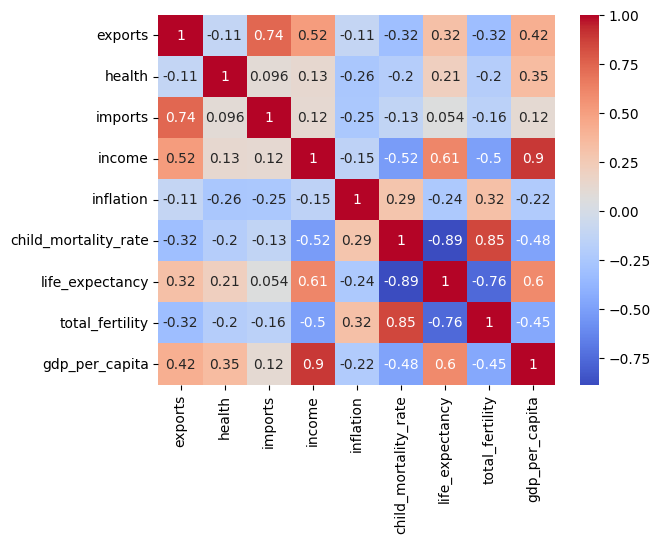

In [14]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap="coolwarm")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               167 non-null    object 
 1   exports               167 non-null    float64
 2   health                167 non-null    float64
 3   imports               167 non-null    float64
 4   income                167 non-null    float64
 5   inflation             167 non-null    float64
 6   child_mortality_rate  167 non-null    float64
 7   life_expectancy       167 non-null    float64
 8   total_fertility       167 non-null    float64
 9   gdp_per_capita        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


## 🤖 3. K-Means Clustering Implementation
The K-Means algorithm divides countries into clusters based on their numerical features.
We also calculate cluster centroids and assign each country to its nearest cluster.

In [16]:
X=df.drop(columns=["country"])

In [17]:
skewed=["gdp_per_capita","income","child_mortality_rate","total_fertility","inflation"]


In [18]:
import numpy as np
# Find minimum inflation value
min_infl = X['inflation'].min()

# If there are negatives, shift them up before log
if min_infl <= -1:
    X['inflation'] = np.log1p(X['inflation'] - min_infl + 1)
else:
    X['inflation'] = np.log1p(X['inflation'])


In [19]:
import numpy as np
X[skewed]=X[skewed].apply(lambda x: np.log1p(x))


In [20]:
X

,exports,health,imports,income,inflation,child_mortality_rate,life_expectancy,total_fertility,gdp_per_capita
0,10.0,7.58,44.9,7.384610,1.321881,4.513055,56.2,1.919859,6.317165
1,28.0,6.55,48.6,9.203416,1.214985,2.867899,76.3,0.974560,8.316545
2,38.4,4.17,31.4,9.465060,1.412214,3.342862,76.5,1.358409,8.403128
3,62.3,2.85,42.9,8.682877,1.471039,4.787492,60.1,1.968510,8.169336
4,45.5,6.03,58.9,9.857496,1.110114,2.424803,76.8,1.141033,9.409273
...,...,...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,7.989899,1.156301,3.407842,63.0,1.504077,7.996654
163,28.5,4.91,17.6,9.711176,1.600066,2.895912,75.4,1.244155,9.510519
164,72.0,6.84,80.2,8.409831,1.362884,3.190476,73.1,1.081805,7.178545
165,30.0,5.18,34.4,8.407602,1.480432,4.048301,67.5,1.735189,7.178545


In [21]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)


In [22]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

## 📊 4. Cluster Distribution & Visualization
Let's visualize the cluster sizes and PCA-based 2D projection to understand country grouping patterns.

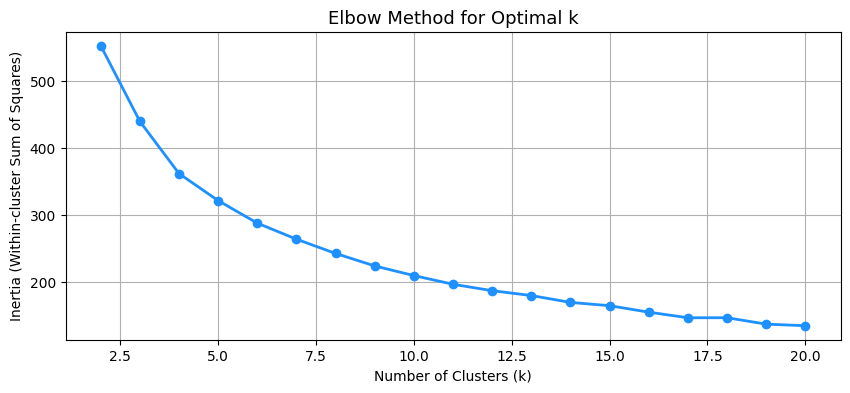

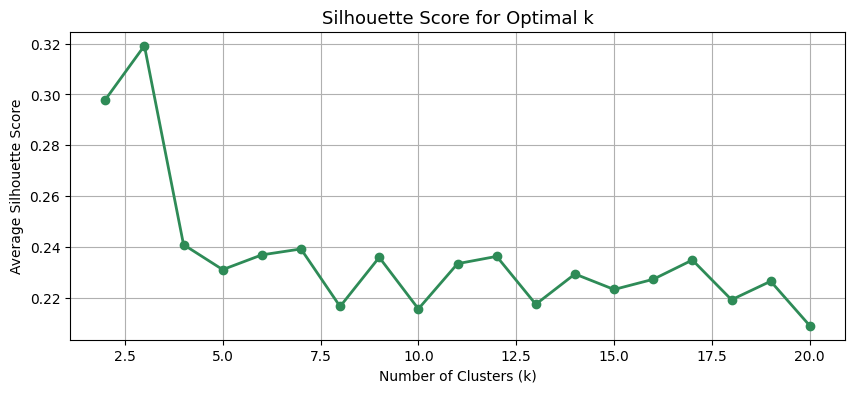

🏆 Best number of clusters (highest silhouette): 3


In [23]:
# 🧩 Step 3 — Finding the Optimal Number of Clusters
# --------------------------------------------------

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# (Assuming X_scaled is already prepared after scaling)
# If not, replace X_scaled with your scaled DataFrame/array

inertia = []       # total within-cluster sum of squares
silhouette = []    # silhouette scores
K = range(2, 21)   # try k = 2 ... 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# ----- Plot 1: Elbow Method -----
plt.figure(figsize=(10, 4))
plt.plot(K, inertia, 'o-', linewidth=2, color='dodgerblue')
plt.title('Elbow Method for Optimal k', fontsize=13)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

# ----- Plot 2: Silhouette Score -----
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette, 'o-', linewidth=2, color='seagreen')
plt.title('Silhouette Score for Optimal k', fontsize=13)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# ----- Display best k -----
best_k = K[silhouette.index(max(silhouette))]
print(f"🏆 Best number of clusters (highest silhouette): {best_k}")


In [24]:
from sklearn.cluster import KMeans
k=3
kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
clusters=kmeans.fit_predict(X_scaled)

In [25]:
data=df.copy()
data['Cluster']=clusters
data.head()


,country,exports,health,imports,income,inflation,child_mortality_rate,life_expectancy,total_fertility,gdp_per_capita,Cluster
0,Afghanistan,10.0,7.58,44.9,1610.0,9.44,90.2,56.2,5.82,553.0,1
1,Albania,28.0,6.55,48.6,9930.0,4.49,16.6,76.3,1.65,4090.0,2
2,Algeria,38.4,4.17,31.4,12900.0,16.10,27.3,76.5,2.89,4460.0,2
3,Angola,62.3,2.85,42.9,5900.0,22.40,119.0,60.1,6.16,3530.0,1
4,Antigua and Barbuda,45.5,6.03,58.9,19100.0,1.44,10.3,76.8,2.13,12200.0,2


C:\Users\manoj\AppData\Local\Temp\ipykernel_8948\1372846785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster',data=data,palette='Set2')


<Axes: xlabel='Cluster', ylabel='count'>

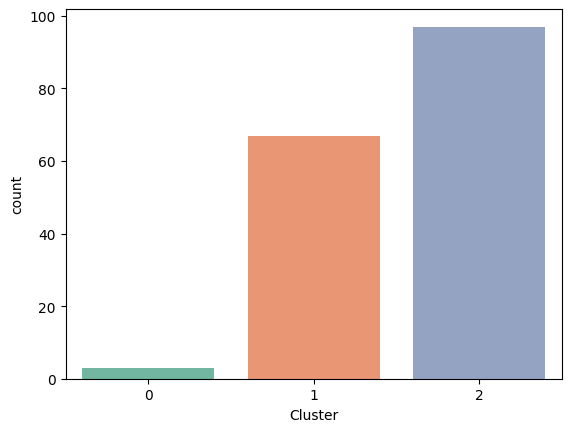

In [28]:
sns.countplot(x='Cluster',data=data,palette='Set2')

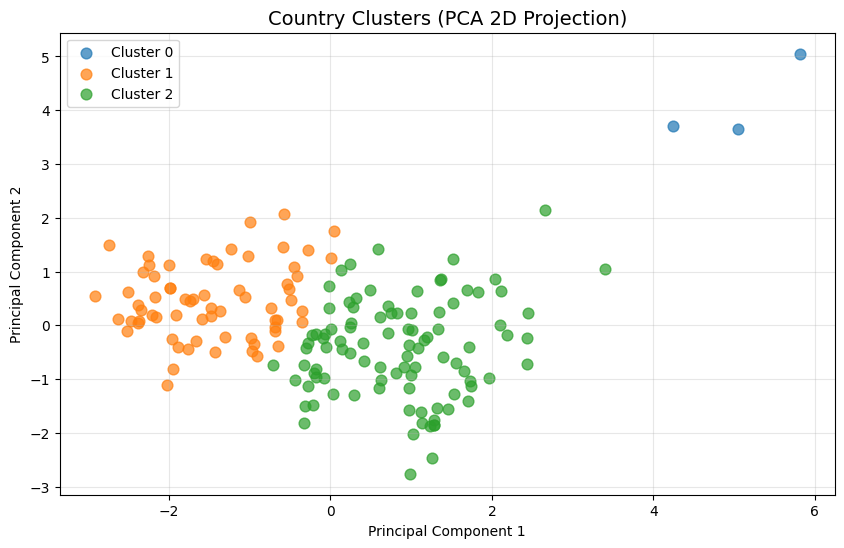

Explained variance by 2 components: 72.27%


In [26]:
# 🧩 Step 5 — Visualize Clusters using PCA (2D)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results and cluster labels to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']
pca_df['country'] = data['country']

# Plot clusters
plt.figure(figsize=(10,6))
for c in sorted(pca_df['Cluster'].unique()):
    plt.scatter(
        pca_df[pca_df['Cluster'] == c]['PCA1'],
        pca_df[pca_df['Cluster'] == c]['PCA2'],
        label=f'Cluster {c}', alpha=0.7, s=60
    )

plt.title('Country Clusters (PCA 2D Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check variance explained by the 2 PCA components
print(f"Explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2%}")


### 🔍 Visual Interpretation
- **Cluster 0:** Small, high-income developed countries with strong health systems.
- **Cluster 1:** Developing nations with low income and high mortality rates.
- **Cluster 2:** Emerging economies with balanced development indicators.

## 📋 5. Cluster Summary Table
Below is the summary of key indicators for each cluster, representing different development levels.

In [27]:
import pandas as pd

summary = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Exports': [176.00, 29.51, 44.95],
    'Health': [6.79, 6.14, 7.28],
    'Imports': [156.67, 43.63, 45.75],
    'Income': [64033.33, 4142.13, 24675.67],
    'Inflation': [2.47, 11.23, 5.56],
    'Child Mortality Rate': [4.13, 76.49, 12.92],
    'Life Expectancy': [81.43, 61.82, 76.25],
    'Total Fertility': [1.38, 4.44, 1.97],
    'GDP per Capita': [57566.67, 1944.54, 19196.19]
}).set_index('Cluster')
summary

,Exports,Health,Imports,Income,Inflation,Child Mortality Rate,Life Expectancy,Total Fertility,GDP per Capita
Cluster,,,,,,,,,
0,176.00,6.79,156.67,64033.33,2.47,4.13,81.43,1.38,57566.67
1,29.51,6.14,43.63,4142.13,11.23,76.49,61.82,4.44,1944.54
2,44.95,7.28,45.75,24675.67,5.56,12.92,76.25,1.97,19196.19


### 📈 Interpretation
- **Cluster 0:** Developed countries — high GDP, low fertility and mortality, strong health indicators.
- **Cluster 1:** Developing countries — low GDP, high fertility, low life expectancy.
- **Cluster 2:** Emerging countries — moderate GDP and improving health conditions.

## 🧠 6. Key Insights & Future Enhancements
**Key Takeaways:**
- K-Means effectively grouped nations into meaningful socioeconomic clusters.
- PCA helped visualize how development indicators differ across clusters.
- Clear separation between developed and developing countries.

**Future Work:**
- Integrate real-time global data (World Bank, IMF APIs)
- Extend analysis using DBSCAN or Hierarchical clustering
- Deploy an interactive dashboard using Streamlit or Power BI


---
📘 Created by Abhiram 